# Emotion Detection Project

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/gr33n/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gr33n/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gr33n/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading the dataset and EDA

In [3]:
dataset = pd.read_csv("../ml/data/ISEAR.csv", header=None)
dataset.head()

,0,1,2
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...


In [4]:
# Dropping the 1st column
dataset_modified = dataset.drop(columns=[0], axis=1)

# Adding column_names to the dataframe
dataset_modified.columns = ['emotion', 'sentences']

In [5]:
# Information on the dataset
dataset_modified.info()

# About 7500 samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7446 entries, 0 to 7445
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emotion    7446 non-null   object
 1   sentences  7446 non-null   object
dtypes: object(2)
memory usage: 116.5+ KB


In [6]:
# count of each emotion; check for imbalanced dataset.
dataset_modified['emotion'].value_counts()

# Seems balanced

joy        1082
sadness    1074
anger      1069
fear       1063
disgust    1059
shame      1059
guilt      1040
Name: emotion, dtype: int64

In [7]:
# checking missing values
dataset_modified.isnull().sum()

# No null values

emotion      0
sentences    0
dtype: int64

## Preprocessing the sentences (An alternative option)

```Trying with 5 emotions```

There are 7 unique emotions present in the dataset, ```joy, sadness, anger, fear, digust, shame, and guilt```Since, the client stated to have 5 emotions. Let's replace ```shame``` with ```fear``` and ```guilt``` with ```sadness```.


In [8]:
dataset_modified['new_emotion'] = dataset_modified['emotion'].replace({'shame': 'fear',
                                                     'guilt':'sadness'})

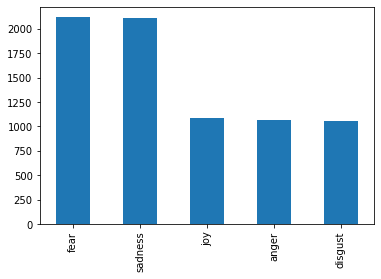

In [9]:
dataset_modified['new_emotion'].value_counts().plot(kind='bar')

In [37]:
dataset_modified.head()

,emotion,sentences,new_emotion,preprocessed_sentences,target
0,joy,On days when I feel close to my partner and ot...,joy,day feel close partner friend feel peace also ...,3.0
1,fear,Every time I imagine that someone I love or I ...,fear,every time imagine someone love could contact ...,2.0
2,anger,When I had been obviously unjustly treated and...,anger,obviously unjustly treated possibility elucida...,0.0
3,sadness,When I think about the short time that we live...,sadness,think short time live relate period life think...,4.0
4,disgust,At a gathering I found myself involuntarily si...,disgust,gathering found involuntarily sitting next two...,1.0


### Converting into lowercase.

Converting to lowercase is important as ```On``` is different from ```on``` for computers but not us humans. Just for keeping the original columns, let's make a copy of the sentences column.

__Note__: This also removes the ```\n``` or ```enters``` in the sentences.

In [11]:
dataset_modified['preprocessed_sentences'] = dataset_modified['sentences']

In [12]:
# converting to lower case.
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'].apply(lambda x: ' '.join\
                                        (x.lower() for x in x.split()))

### Removing non-alphanumeric portions

```. and ,``` is present in the sentences. Removing them.

In [13]:
# removing symbols
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .str.replace('.', '')
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .str.replace(',', ' ')

## Tokenization

Converting the sentences in token of words through, which words are identified, seperated and classified. This also allows easier accesibility for later preprocessing.

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .apply(word_tokenize)

## Removing Stop Words

Frequently occuring words such as articles ```I, you```  and some verbs might help in finding the context of the sentence. Removing them mightn't have any negative consequences.

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [17]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .apply(lambda x: [token for token in x if token not in stop_words])

### Lemmatization for word normalization

Converting verbs into base form.

In [18]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [19]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                            .apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

In [20]:
dataset_modified['preprocessed_sentences'][0]

['day',
 'feel',
 'close',
 'partner',
 'friend',
 'feel',
 'peace',
 'also',
 'experience',
 'close',
 'contact',
 'people',
 'regard',
 'greatly']

In [21]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'].apply(lambda x: ' '.join(x))

### Label encoding the target emotions

In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

In [64]:
dataset_modified['target'] = encoder.fit_transform(np.array(dataset_modified['emotion']).reshape(-1,1))

## Baseline model training step(Count Vectorizer with Naive bayes)


In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

naive_bayes_model = Pipeline([('count_vectorizer', CountVectorizer(ngram_range=(1,2))), ('bayes', MultinomialNB())])



### Train_test_split

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_modified['preprocessed_sentences'], 
                                                    dataset_modified['target'], 
                                                    test_size=0.2)

In [135]:
naive_bayes_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('bayes',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [136]:
test_label = naive_bayes_model.predict(X_test)
train_label = naive_bayes_model.predict(X_train)

In [137]:
from sklearn import metrics
print('*'*25 + 'Training' + '*'*25)
print(metrics.classification_report(y_train, train_label, digits=3))
print('*'*25 + 'Testing' + '*'*25)
print(metrics.classification_report(y_test, test_label, digits=3))


*************************Training*************************
              precision    recall  f1-score   support

         0.0      0.946     0.947     0.946       849
         1.0      0.970     0.943     0.956       856
         2.0      0.960     0.951     0.955       852
         3.0      0.959     0.945     0.952       821
         4.0      0.942     0.958     0.950       862
         5.0      0.934     0.946     0.940       865
         6.0      0.935     0.954     0.945       851

    accuracy                          0.949      5956
   macro avg      0.949     0.949     0.949      5956
weighted avg      0.949     0.949     0.949      5956

*************************Testing*************************
              precision    recall  f1-score   support

         0.0      0.468     0.464     0.466       220
         1.0      0.659     0.581     0.618       203
         2.0      0.646     0.692     0.668       211
         3.0      0.479     0.516     0.497       219
         4.0   

Text(91.68, 0.5, 'predicted label')

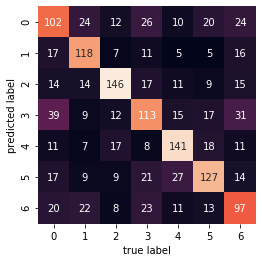

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, test_label)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')